# Part I - (Ford GoBike System Data)
## by (Jonah Okiru)

## Introduction
> Bay wheels is  aregional public bicycle sharing system in San Francisco Bay area. The system is operated by Motivate in partnership with metropolitan Transportation commission and Bay area air Quality management district. It's the first regional and large scale bicycle sharing system deployed in california and on the west coast of United States. Initially Bay wheels was established as Bay Area Bike share in August 2013. As of January 2018 The Bay wheels had over 2600 bicyles in 262 stations across San Francisco, East Bay and Jose. In 2108 the system was relaunced as Ford Gobike in partnership with Ford Motor Company. The dataset used in exploratory analysis is in CSV formart.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load the dataset
df=pd.read_csv('fordgobike_tripdata.csv')



## Assessing the data

In [3]:
# Preview the dataset
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Check the number of records  and features in the data
df.shape

(183412, 16)

In [5]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


The dataset column data types is as follows; 7(float64), 2(int64), 7(object).

In [6]:
# Check the duplicates in the dataset
df.duplicated().sum()

0

The dataset has no duplicate records.

In [7]:
# Check for the missing values in the dataset
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

The columns with missing values are start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender. 

In [8]:
# check the percentage of the variables missing values
df.isnull().sum() / len(df)   * 100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

The missing values is less than 5% of the data in all the columns with missing values.

## Cleaning the data

In [9]:
# Drop the missing records
df.dropna(inplace=True)


The missing records are sropped since they represent less than 5% of the variable data.

In [10]:
# Confirm if the missing values is dropped
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# Fixed the columns datatypes
# Convert the start time and end time from str datatype to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# convert start_station_id, end_station_id and bike_id  to str
df['start_station_id']= df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

# Convert user type and member gender to categorical
df['user_type'] = df['user_type']. astype('category')
df['member_gender'] = df['member_gender'].astype('category')

In [12]:
# Confirm if the dtatypes are correct after the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), obj

In [13]:
# Add columns start day of the week, duration in minutes, start hour of the day, start month and also start day of the week
df['duration_minutes'] = df['duration_sec']/ 60
df['start_hour_of_day'] = df['start_time'].dt.strftime('%H')
df['the_start_date'] = df['start_time'].dt.strftime('%Y-%m-%d')
df['start_day_week'] = df['start_time'].dt.strftime('%A')
df['start_month'] = df['start_time'].dt.strftime('%B')

In [14]:
# Add columns end day of the week, end hours of the day, end month and end day of the week
df['end_hour_of_day'] = df['end_time'].dt.strftime('%H')
df['the_end_date'] = df['end_time'].dt.strftime('%Y-%m-%d')
df['end_day_week'] = df['end_time'].dt.strftime('%A')
df['end_month'] = df['end_time'].dt.strftime('%B')

In [15]:
# Check if the new colums have been added
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,duration_minutes,start_hour_of_day,the_start_date,start_day_week,start_month,end_hour_of_day,the_end_date,end_day_week,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,869.750000,17,2019-02-28,Thursday,February,08,2019-03-01,Friday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,1030.900000,12,2019-02-28,Thursday,February,05,2019-03-01,Friday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,608.166667,17,2019-02-28,Thursday,February,04,2019-03-01,Friday,March


In [16]:
# Drop the columns of start_time and End_time
df.drop(columns=['start_time', 'end_time'], axis=1, inplace=True)


In [17]:
# check to confirm if the columns are dropped
df.columns

Index(['duration_sec', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'duration_minutes', 'start_hour_of_day',
       'the_start_date', 'start_day_week', 'start_month', 'end_hour_of_day',
       'the_end_date', 'end_day_week', 'end_month'],
      dtype='object')

### What is the structure of your dataset?

> The original data set contains 174,952 records with i6 variables. Fuethermore, it is divided into three broad categories namely; 

1. Trip duration - contains the variables of duration_sec, start time and end time.

2. Station information- contains the variables of start_station_id, start_station_name, start_station_latitude, 

   start_station_longitude, end_station_id, end_station_name, end_station_latitude and end_station_longitude.
   
3. Member information-  contains the variables of bike_id, user_type, Member_birth_year, member_gender and bike_share for all 

   trip.
4. Features derived through feature engineering to aid in exploration and analysis includes; 'duration_minutes', 
 
    'start_hour_of_day', 'the_start_date', 'start_day_week', 'end_hour_of_day', 'the_end_date', 'end_day_week', 'end_month'

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in exploring the  duration of bike trips and the occurence of rental events. I also want to relate them to characteristics of the rider such as bike share for all trip , member gender and user type. These will help to make insights on what purpose do people use bike sharing services for. The questions to Answer include the following ; the average time a trip takes, the time that most trips are taken interms of day , day of the week, month, do the average time for trip and the purpose of using bike sharing services depends on the user type i.e customer or subscriber
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> TheFeatures derived through feature engineering such trip duration in minutes, start hour, start day , start date , start of the month, end hour of the day , end date, end day of the week and end of month , will help to get insights on how long a trip takes and when. The information from the member such as  member gender, user type and bike share for all trips will help to get insights on who are the main target group.

## Univariate Exploration



In [18]:
# Order the days of the week and convert it into category data type
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day_week'] = df['start_day_week'].astype(weekdaycat)

In [19]:
#Define the function for univariate bar plotting
base_color = sb.color_palette('colorblind')[0]



def countplot(df, col, color, title, size):
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.title(title)
    base_color = sb.color_palette('colorblind')[0]
    ans =sb.countplot(data=df, x= col, color=base_color)
    return ans
    

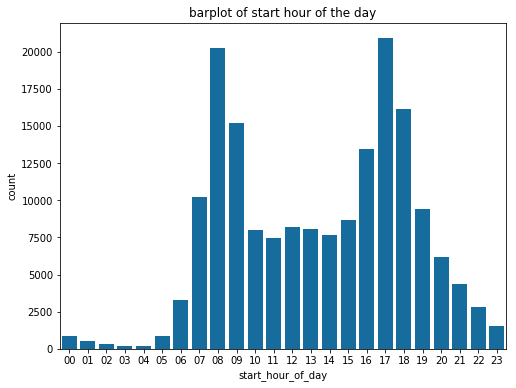

In [20]:
# plot the distribution of the start hour of the day
countplot(df, 'start_hour_of_day', color=base_color, title='barplot of start hour of the day', size=(10,6));

> from the barplots most of the trips at 08 hours and 17 hours of the day.

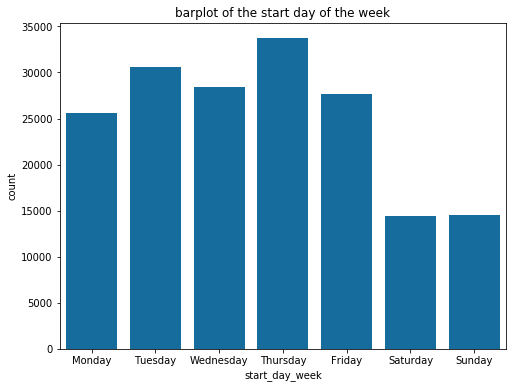

In [21]:
# The distribution of the start day of the week
countplot(df, 'start_day_week', color=base_color, title='barplot of the start day of the week', size=(10, 6));



> from the bar chart its observed Thursday had the most trips started and sturday and sunday had the list number of trips started.

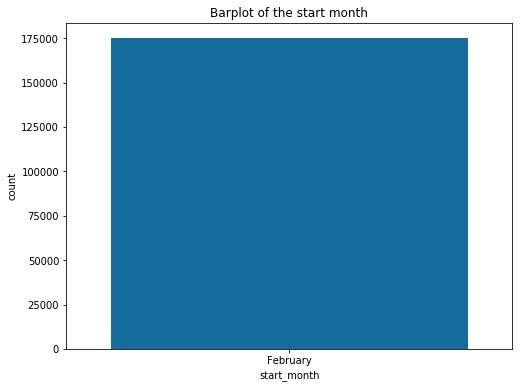

In [22]:
# The distribution of the start month
countplot(df, 'start_month', color=base_color, title='Barplot of the start month', size =(10,6));

> From the bar chart the prrogram started at the month of february.

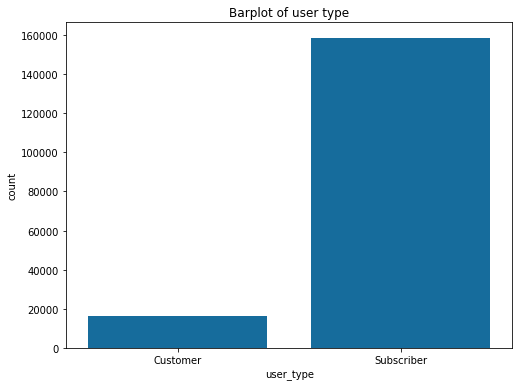

In [23]:
# Check the distribution of the users type
countplot(df, 'user_type', color=base_color, title='Barplot of user type', size=(10,6));

> Subscriber had the most and the customer had the least.

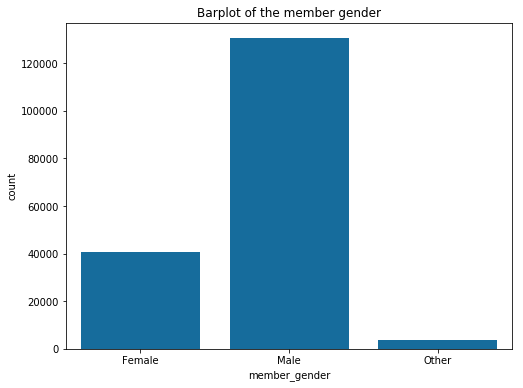

In [24]:
# Check the distribution of the member gender
countplot(df, 'member_gender', color=base_color, title='Barplot of the member gender', size=(10, 6));


Males had most followed by female and others respectively.

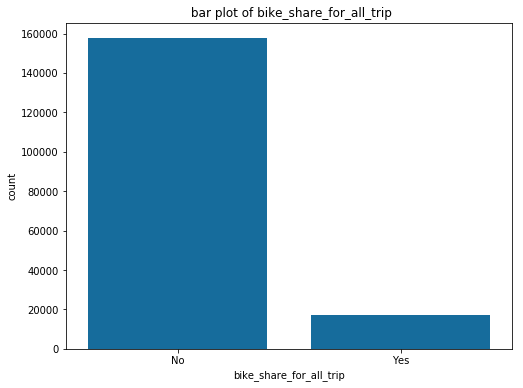

In [25]:
# Check the distribution of the bike share for all trip
countplot(df, 'bike_share_for_all_trip', color=base_color, title=' bar plot of bike_share_for_all_trip', size=(10, 6));

> No had most and yes the least.

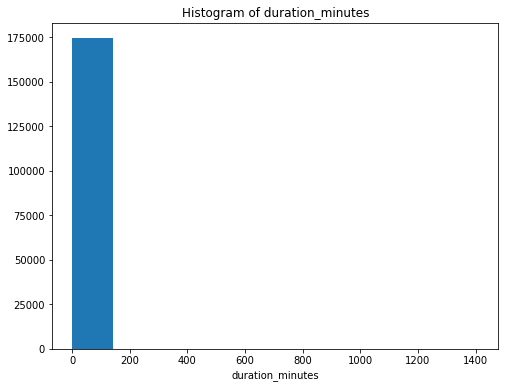

In [26]:
#Univaraite histogram plotting of the time duration
plt.hist(data=df, x='duration_minutes')
plt.xlabel('duration_minutes')
plt.title('Histogram of duration_minutes')
plt.show()

> from the visuaization the duration of the rides ranges from 0 minutes to around 200 minutes. I will do further analysis to get to understand the situation.

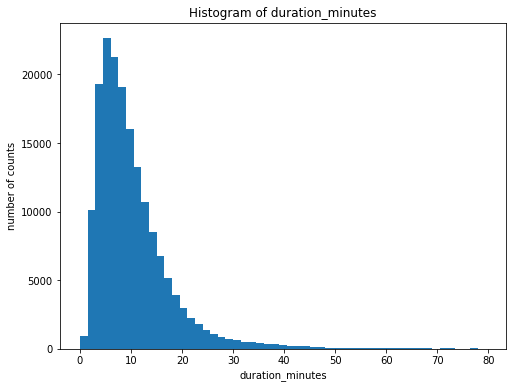

In [27]:
# Further explorations of the duration in minutes, in order to get clear insights
bins = np.arange(0, 80, 1.5)
ticks = np.arange(0, 80, 5)
plt.hist(data=df, x='duration_minutes', bins=bins)
plt.xlabel('duration_minutes');
plt.ylabel('number of counts')
plt.title('Histogram of duration_minutes');
plt.show()




> From the visualizations above it looks like most of the trips were less than an hour and most of them taking a duration of between 5 and 10 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trips peaked from 08 hours to 09 hours and from 17 hours to 18 hours of the day. The number of trips were more during the week days compare to the weekend days.
> The number of male users of the service were more compared to female, and also most of the users of the service were subscribers and very few were customers and lastely most of the users did not share their bike for the all trip.
> The duration of most of the trips were between 5 to 10 minutes.
> There was no any transformation done since the data was okay and staright forward.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The initials plot of duration in minutes was at first alittle bit confusing since the plot displayed only one histogram. I had to define the bin size inorder to zoom it in into smaller ranges , which makes the histogram plot of the distribution much clearer.

## Bivariate Exploration

In [28]:
# bivariate barplot function
def barplot(df, x, y, title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ans= sb.barplot(data=df, x=x, y=y, color=base_color)
    return ans

> How the duration in minutes varies with user type.

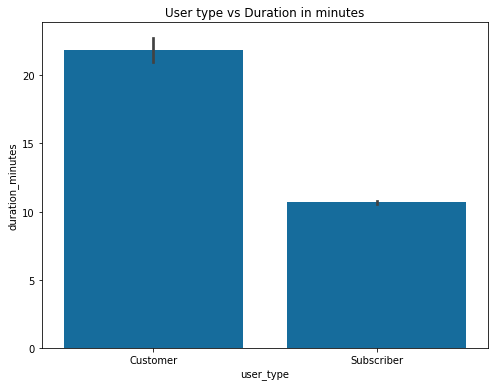

In [29]:
#calling the function
# Bivariate barplot of Durations in minutes vs user type
barplot(df, 'user_type', 'duration_minutes', 'User type vs Duration in minutes', 'user type', 'duration in minutes');

> The customer takes long duration on the trip than subscriber customer types.


> how the distribution of the trip vary by gender.

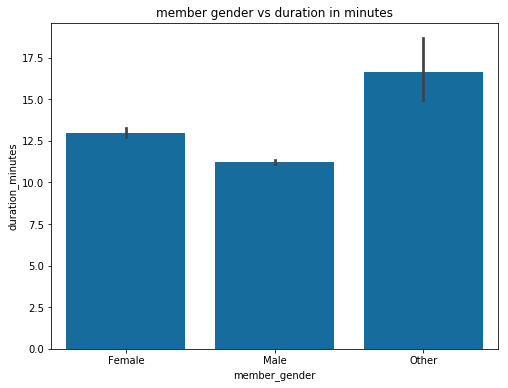

In [30]:
# Barplot of the duration of the trip and gender
barplot(df, 'member_gender', 'duration_minutes', 'member gender vs duration in minutes', ' member gender', 'duration minutes');


> Male gender takes short duration for the trips compared to female gender.

> Trips duration on the days of the week

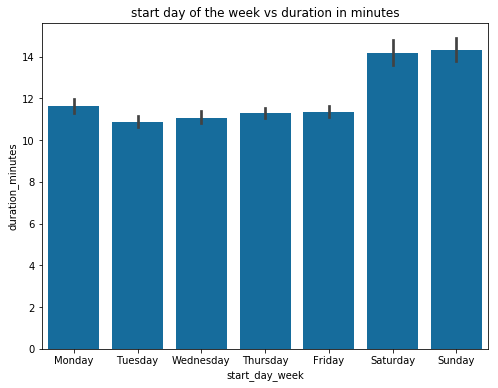

In [31]:
#Barplot of the duration vs days of the week
barplot(df, 'start_day_week', 'duration_minutes', 'start day of the week vs duration in minutes', 
        'day of the week', 'durations mins');

> The duration of the trips on week days was much shorter compared to the weekends.

In [32]:
# cluster barplot  function
def clusterbarplot(df, x, y, title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ans=sb.countplot(data=df, x=x, hue=y)
    return ans

> Weekly usage by user type(customers and subscribers)

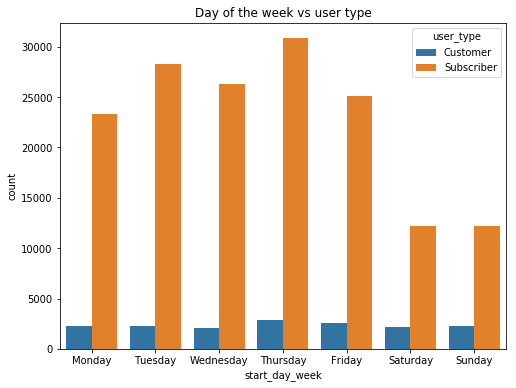

In [33]:
# Clustered barplot of start day of the week vs user type
clusterbarplot(df, 'start_day_week', 'user_type', 'Day of the week vs user type', 'day of the week', 'count');

> Generally there were more subscriber users than the customers all throughout the week. The usage of the bikes over week days was higher than the weekend.

> Hourly usage of the bikes by user type.

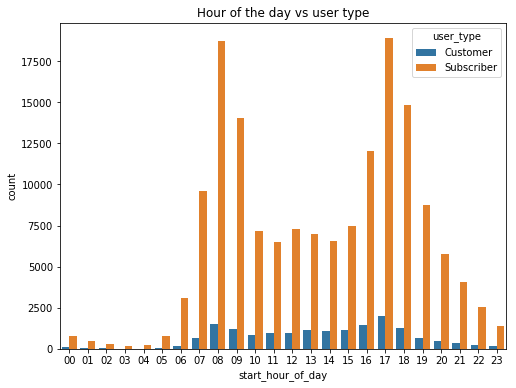

In [34]:
#Clustered barplot of hour of the day vs user type.
clusterbarplot(df, 'start_hour_of_day', 'user_type', 'Hour of the day vs user type', 'hour of day', 'count');

> Overall the subscribers usage is higher than the customers. The usage of the services peak during the rush hours of 07 hours to 09 hours and 16 hours to 18 hours.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The number of subscribers is more than the customers, the habit of riding varies greatley between the customers and subscribers. For instance the subscribers tend to use the bike sharing system mainly to commute to work and off work, with the peak hours range from 07 to 09 hours in the morning and afternoon from 16 to 18 hours. The customers use the  bike sharing system mostly for fun and leisure during the afternoon and during the weekend.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> it is interesting to see that the duration of the trips are bit longer on the weekends compared to week days.

## Multivariate Exploration

How the  trip duration varies during the days of the week between user types

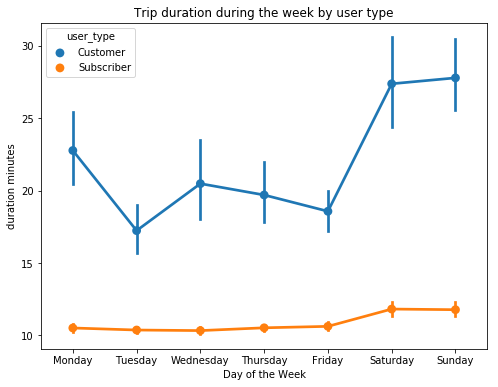

In [35]:
# The point plot of the variation of the trips during week days among users.
sb.pointplot(data=df, x='start_day_week', y='duration_minutes', hue='user_type');
plt.title('Trip duration during the week by user type')
plt.xlabel('Day of the Week');
plt.ylabel('duration minutes');
plt.show()

> from the point plot above we can see that the subscribers take short duration on each day trips compared to customers whom take slightly longer time on each day trip. The range of duration of each day for subscribers is small compared to customers whose range is abit huge.

> The varialibilty of durations of hourly usage  among the users

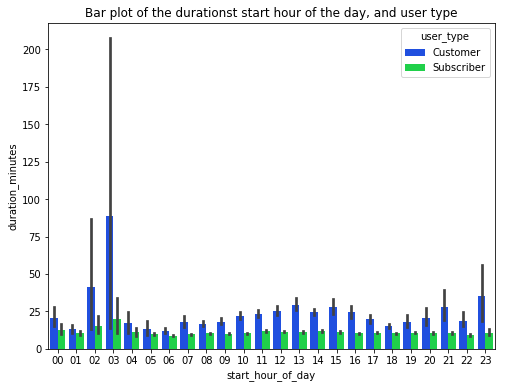

In [36]:
#Bar plot of the durationst start hour of the day, and user type
sb.barplot(x='start_hour_of_day', y='duration_minutes', data=df, palette='bright' ,hue='user_type');
plt.title('Bar plot of the durationst start hour of the day, and user type');

> The duration of the trip was longer during the 03 hours, followed by 02 hours respectively. The customers overall take longer to cover the trip than the subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The subscribers takes shorter durtions on each day trip compared to customers. Also the range of duration for the subscribers is shorter compared to Customers on each day. And the hour of the day the trips takes longer for both users is the 03 hours.

### Were there any interesting or surprising interactions between features?

> The duration of the trip is longer during the 03 hours. Since 03 hours is the wee hours of the night with very few pendestrians and motorcade on the roads i expect the trip to take shorter duration .

## Conclusions

> 1. The peak hour for the trip is twice a day morning from 08 hours to 09 hours and evening from 17 hours to 18 hours. 
> 2. More trips occur during the week days compared to the weekend, as many people use the bike sharing system to and from work place
> 3. Trips on the weekend are fewer as people who use the system on the weekend mainly for leisure purposes.
> 4. Most of the users of bike sharing system are subscribers.
> 5. More male use the services comapred to female.
> 6. Most of the users of the services do not share the bike for all trip.
> 7. The duration for most trips is between 5 to 10 minutes.
> 8. Customers takes longer to cover the trip compared to subscribers.
> 9. Female users take alittle longer to cover the trip compared to male users.
> 10. The duration of the trip was alittle  longer during the weekend compared to week days. This due to mainly during the weekend users use the services for leisure and on week days they use to report and to leave their workplaces.
> 11. The usage of the bike is higher on the week day compared to weekend.
> 12. The usage of the bike is higher during the peak hours of 08 to 09 hours and 17 to 18 hours.
> 13. The duration of the trip is longer during the 03 hours.
